In [1]:
# Context
# Have you ever wondered when the best time of year to book a hotel 
# room is? Or the optimal length of stay in order to get the best daily 
# rate? What if you wanted to predict whether or not a hotel was likely 
# to receive a disproportionately high number of special requests?

# This hotel booking dataset can help you explore those questions!

In [2]:
# Content
# This data set contains booking information for a city hotel and 
# a resort hotel, and includes information such as when the booking 
# was made, length of stay, the number of adults, children, and/or 
# babies, and the number of available parking spaces, among other things.

# All personally identifying information has been removed from the data.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
hotel_bookings = pd.read_csv('hotel_bookings.csv')
hotel_bookings.head(10)

# hotel : Hotel (H1 = Resort Hotel or H2 = City Hotel)

# is_canceled : Value indicating if the booking was canceled 
# (1) or not (0)

# lead_time : Number of days that elapsed between the 
# entering date of the booking into the PMS and the arrival date

# arrival_day_week_number : Week number of year for arrival date

# arrival_date_day_of_month : Day of arrival date

# stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) 
# the guest stayed or booked to stay at the hotel

# stays_in_week_nights : Number of week nights (Monday to Friday) the 
# guest stayed or booked to stay at the hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [5]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

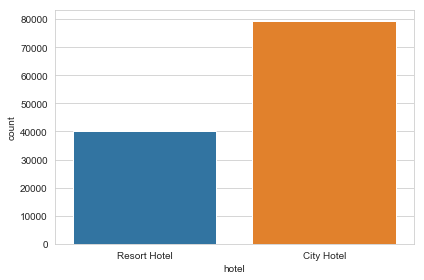

In [6]:
# Compare the number of booked hotels of each type
sns.set_style('whitegrid')
sns.countplot(x='hotel', data=hotel_bookings)
plt.tight_layout()

City Hotels are booked more than Resort Hotels,

Resort Hotel usually has additional sports and leisure facilities, framed in a natural environment and that attract the visitor beyond the room.

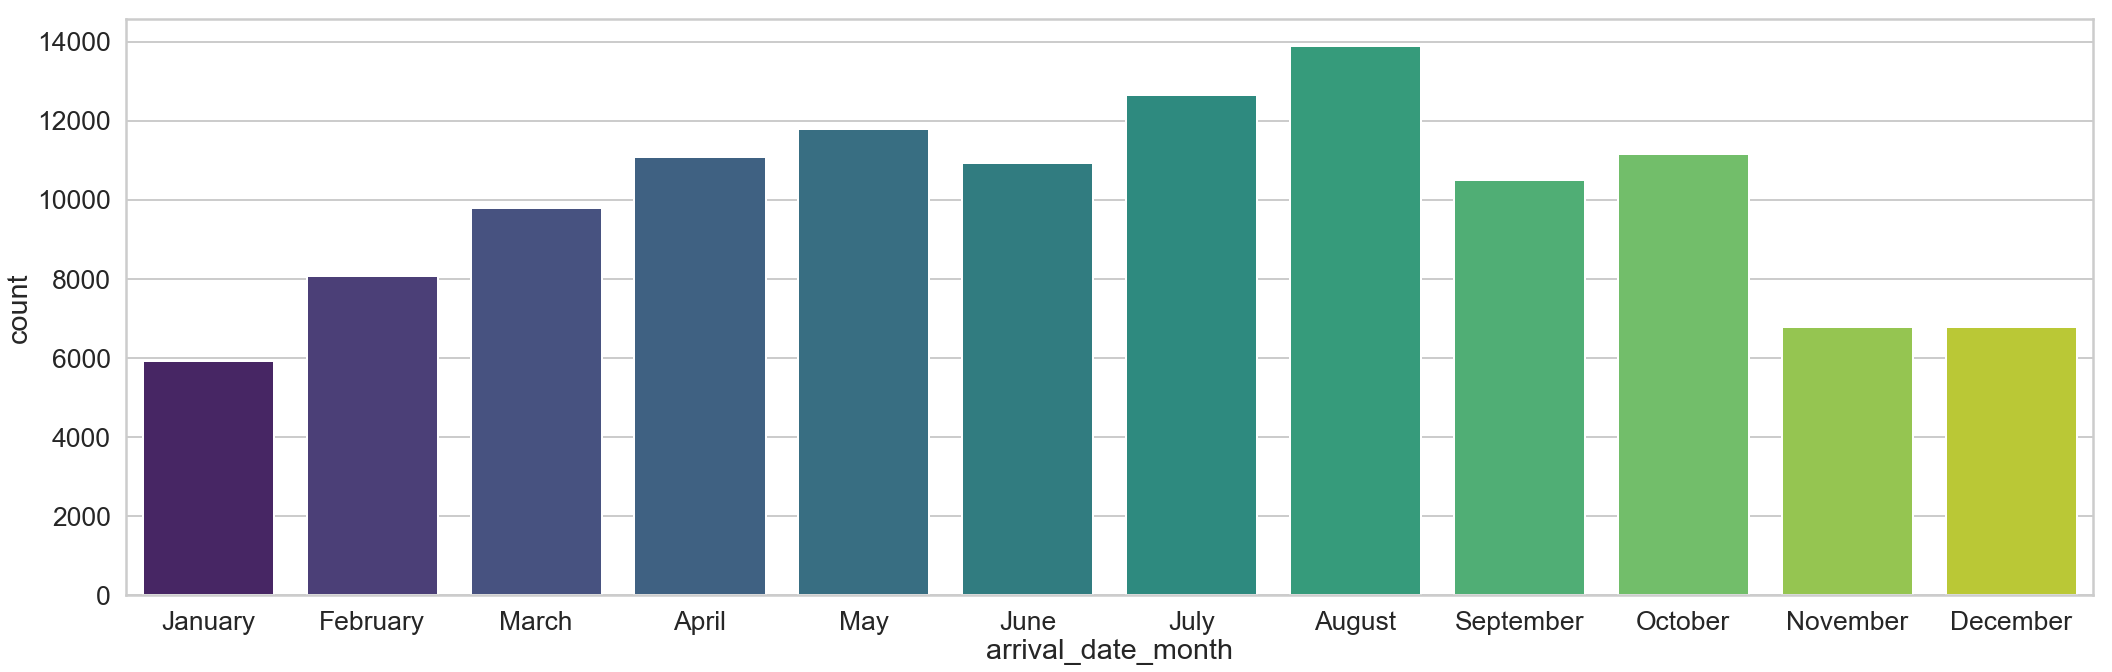

In [23]:
# Count the arrivals in each month

months = ['January', 'February', 'March', 'April', 'May', \
          'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.set_style('whitegrid')
plt.figure(figsize=(30, 10))
sns.set_context('poster', font_scale=1.2)
sns.countplot(x='arrival_date_month', data=hotel_bookings, order = months, palette='viridis')
plt.tight_layout()

We can observe that maximum arrivals are in summers (May-Aug)

In [25]:
hotel_bookings['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

Maximum bookings are done by Transient customers

In [26]:
hotel_bookings['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [34]:
hotel_bookings['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64